# Dimensionality Reduction
## 11/2/2023
<a href="?print-pdf">print view</a>

<a href="dimred.ipynb">notebook</a>

In [1]:
%%html
<script src="https://bits.csb.pitt.edu/preamble.js"></script>

# Recall

(4381, 23)


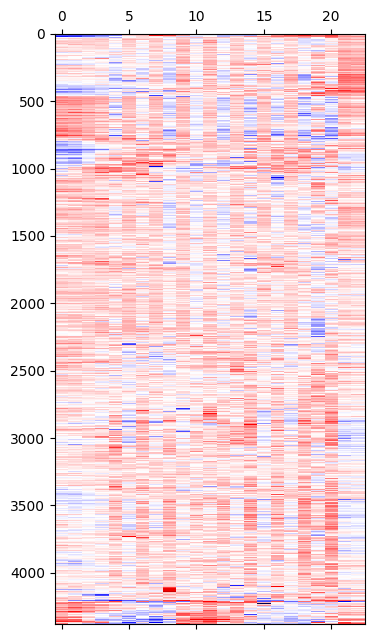

In [2]:
from matplotlib.pylab import cm
import numpy as np
import scipy.cluster.hierarchy as hclust
import matplotlib.pyplot as plt
data = np.genfromtxt('Spellman.csv',skip_header=1,delimiter=',')[:,1:]
Z = hclust.linkage(data,method='complete')
leaves = hclust.leaves_list(Z)
ordered = data[leaves]
print(data.shape)
plt.matshow(ordered,aspect=0.01,cmap=cm.seismic);

In [3]:
%%html
<div id="howdim" style="width: 500px"></div>
<script>
    var divid = '#howdim';
	jQuery(divid).asker({
	    id: divid,
	    question: "What is the dimensionality of this data?",
		answers: ['1','2','23','4381','None of the above'],
        server: "https://bits.csb.pitt.edu/asker.js/example/asker.cgi",
		charter: chartmaker})
    
$(".jp-InputArea .o:contains(html)").closest('.jp-InputArea').hide();


</script>

# Dimenionality Reduction

$$f(\mathbb{R}^N) \rightarrow \mathbb{R}^M, M < N$$

Usually used for visualization so reduce to 2 or 3 dimensions.

Goal is for distances in $\mathbb{R}^M$ to be representative of distances in $\mathbb{R}^N$

# PCA

Recall: principal component analysis finds an orthogonal basis that best represents the variance in the data.

<img width="400" src="https://upload.wikimedia.org/wikipedia/commons/thumb/f/f5/GaussianScatterPCA.svg/1280px-GaussianScatterPCA.svg.png">

In [4]:
from sklearn.decomposition import PCA

In [5]:
model = PCA(n_components=2) #specify number of components
pcaresult = model.fit_transform(data)

In [6]:
model.explained_variance_ratio_

array([0.29005293, 0.15421722])

In [7]:
pcaresult

array([[ 0.53743596,  0.0423628 ],
       [-0.52117275,  0.23262804],
       [-0.92718811, -0.02687607],
       ...,
       [ 2.22481438, -0.63181605],
       [-1.90513202,  0.62147856],
       [-1.52881942,  1.027284  ]])

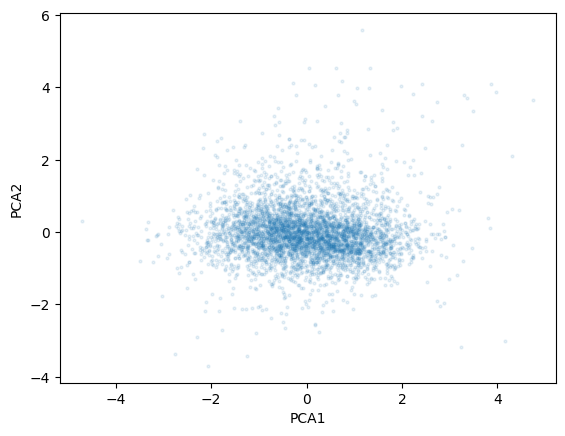

In [8]:
plt.scatter(pcaresult[:,0],pcaresult[:,1],s=4,alpha=.1)
plt.xlabel('PCA1'); plt.ylabel('PCA2');

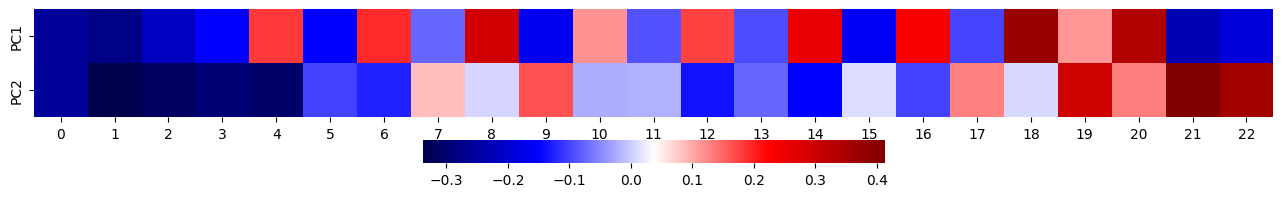

In [9]:
import seaborn as sns
plt.figure(figsize=(16,2))
sns.heatmap(model.components_,cmap=cm.seismic,yticklabels=['PC1','PC2'],
            square=True, cbar_kws={"orientation": "horizontal"});

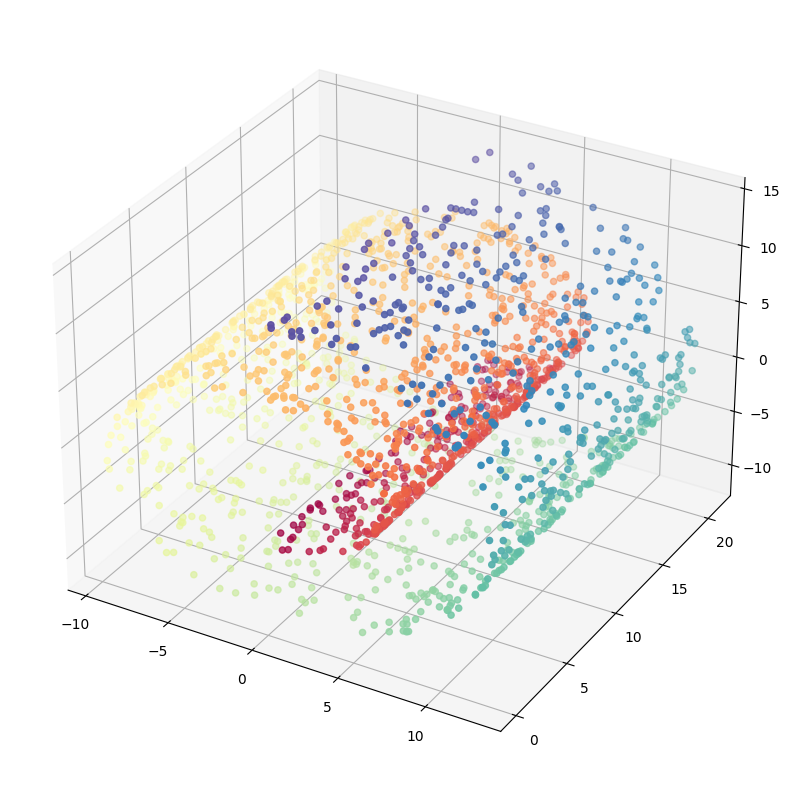

In [10]:
import sklearn.datasets
X,color=sklearn.datasets.make_swiss_roll(n_samples=2000)
fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=color, cmap=plt.cm.Spectral);

In [11]:
%%html
<div id="howpca" style="width: 500px"></div>
<script>
$('head').append('<link rel="stylesheet" href="http://bits.csb.pitt.edu/asker.js/themes/asker.default.css" />');

    var divid = '#howpca';
	jQuery(divid).asker({
	    id: divid,
	    question: "What will the PCA projection to 2D of this data look like?",
		answers: ['Gaussian','Gradient','Spiral','Messy','Square'],
        server: "http://bits.csb.pitt.edu/asker.js/example/asker.cgi",
		charter: chartmaker})
    
$(".jp-InputArea .o:contains(html)").closest('.jp-InputArea').hide();


</script>

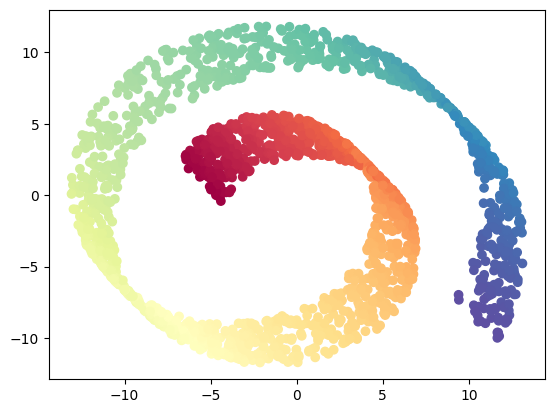

In [12]:
model = PCA(n_components=2) #specify number of components
result = model.fit_transform(X)
plt.scatter(result[:,0],result[:,1],c=color,cmap=plt.cm.Spectral);

Is this a better projection?

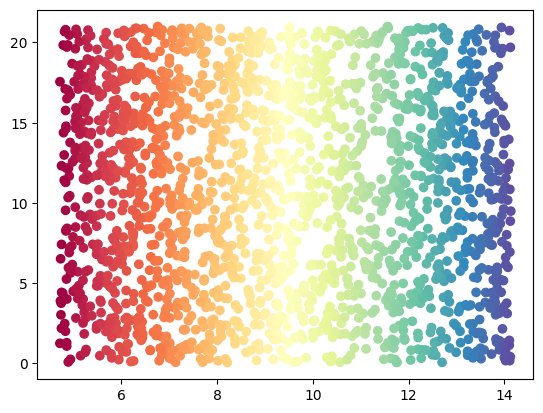

In [13]:
plt.scatter(color,X[:,1],c=color,cmap=plt.cm.Spectral);

# UMAP: Uniform Manifold Approximation & Projection
 
https://umap-learn.readthedocs.io/en/latest/index.html

Idea: Prioritize respecting **local** distances in embedding space.

<img src="https://umap-learn.readthedocs.io/en/latest/_images/how_umap_works_umap_open_cover.png">

# UMAP: Uniform Manifold Approximation & Projection

UMAP constructs a $k$-nearest neighbors graph of the data.  It uses an approximate **stochastic** algorithm to do this quickly.

<img src="https://umap-learn.readthedocs.io/en/latest/_images/how_umap_works_umap_graph.png">

# UMAP: Uniform Manifold Approximation & Projection

Optimizes position of data points in low dimensional space to balance <font color='blue'>attraction</font> of locally adjacent points and <font color='darkred'>repulsion</font> of unconnected, distance points.

$$\mathrm{minimize}\sum_{e\in E} \color{blue}{ w_h(e) \log\left(\frac{w_h(e)}{w_l(e)}\right)} + \color{darkred}{(1 - w_h(e)) \log\left(\frac{1 - w_h(e)}{1 - w_l(e)}\right)}$$

$w_h(e)$ weight of edge in **high** dimensional space (larger weight = smaller distance)

$w_l(e)$ weight of edge in **low** dimensional space (larger weight = smaller distance)

This optimization is done using **stochastic gradient descent** starting at a deterministically constructed initial embedding.

# UMAP: Uniform Manifold Approximation & Projection

The `umap` package is installed with `pip3 umap-learn`

2023-10-30 20:23:59.911285: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


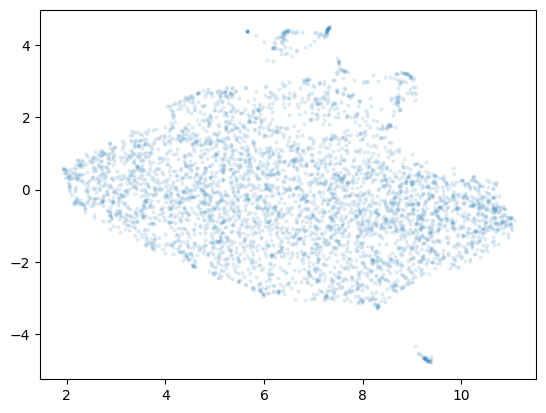

In [14]:
import umap
model = umap.UMAP()
result = model.fit_transform(data)
plt.scatter(result[:,0],result[:,1],s=4,alpha=.1);

## PCA

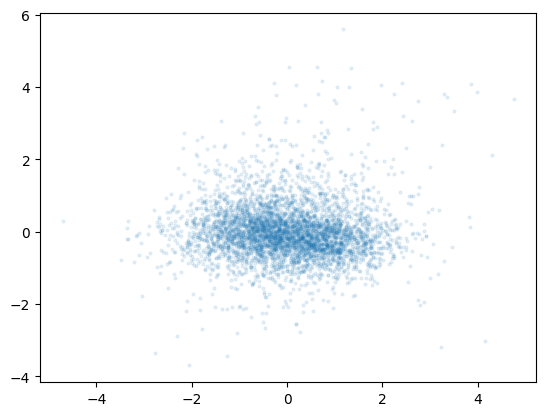

In [15]:
plt.scatter(pcaresult[:,0],pcaresult[:,1],s=4,alpha=.1);

# UMAP Parameters

* `n_neighbors` (15): Number of nearest neighbors to consider.  Increase to respect global structure more.
* `min_dist` (0.1): Minimum distance between points in reduced space. Decrease to have more tightly clustered points.
* `metric` ("euclidean"): How distance is computed.  Can provide user-supplied functions in addition to standard metrics

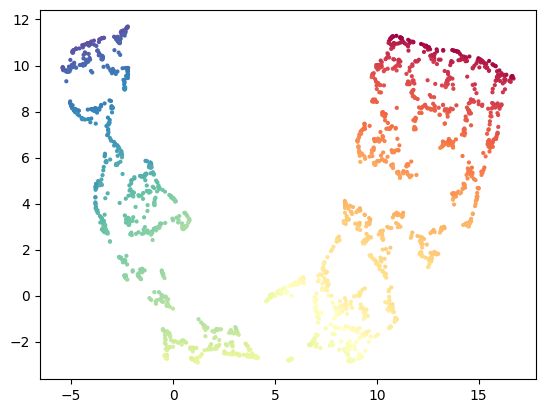

In [16]:
model = umap.UMAP(); result = model.fit_transform(X)
plt.scatter(result[:,0],result[:,1],s=4,c=color,cmap=plt.cm.Spectral);

### n_neighbors

/home/dkoes/.local/lib/python3.10/site-packages/sklearn/manifold/_spectral_embedding.py:393: UserWarning: Exited at iteration 2000 with accuracies 
[5.14049918e-15 7.11993798e-07 1.42519665e-06 2.45386675e-06]
not reaching the requested tolerance 1.7136335372924805e-06.
Use iteration 1762 instead with accuracy 
7.969276319398304e-07.

  _, diffusion_map = lobpcg(
/home/dkoes/.local/lib/python3.10/site-packages/sklearn/manifold/_spectral_embedding.py:393: UserWarning: Exited postprocessing with accuracies 
[2.19023462e-15 4.81898249e-07 5.45600013e-07 2.16001522e-06]
not reaching the requested tolerance 1.7136335372924805e-06.
  _, diffusion_map = lobpcg(


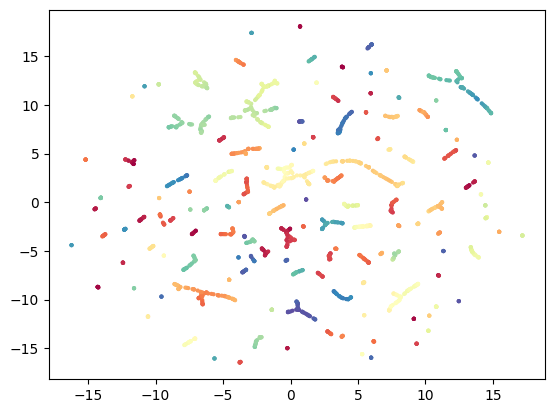

In [17]:
model = umap.UMAP(n_neighbors=3); result = model.fit_transform(X)
plt.scatter(result[:,0],result[:,1],s=4,c=color,cmap=plt.cm.Spectral);

## n_neighbors

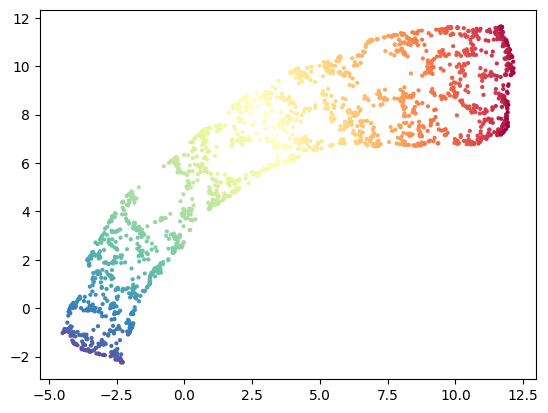

In [18]:
model = umap.UMAP(n_neighbors=100); result = model.fit_transform(X)
plt.scatter(result[:,0],result[:,1],s=4,c=color,cmap=plt.cm.Spectral);

## min_dist

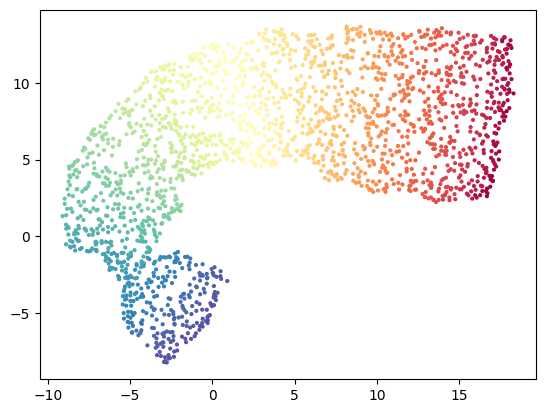

In [19]:
model = umap.UMAP(n_neighbors=100,min_dist=1); result = model.fit_transform(X)
plt.scatter(result[:,0],result[:,1],s=4,c=color,cmap=plt.cm.Spectral);

## metric

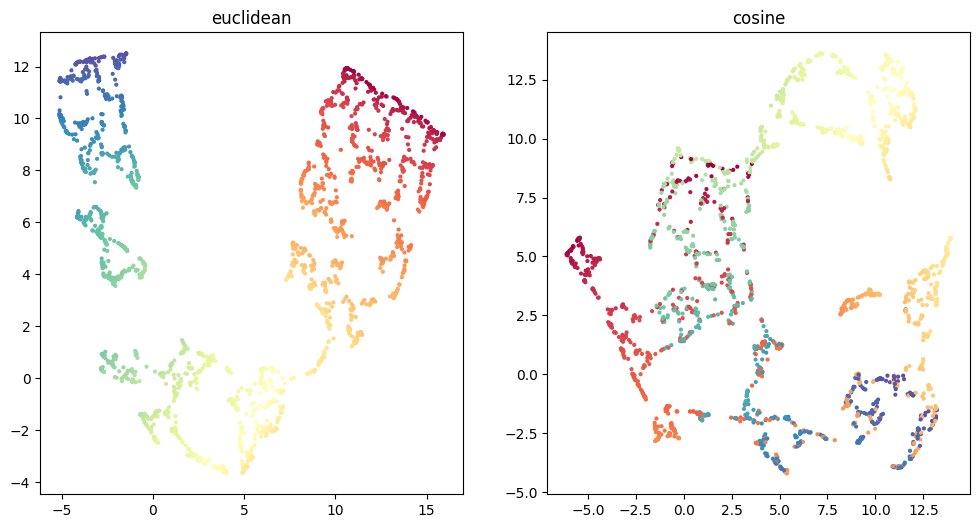

In [20]:
fig,axes = plt.subplots(ncols=2,figsize=(12,6))
model = umap.UMAP(metric='euclidean')
result = model.fit_transform(X)
axes[0].scatter(result[:,0],result[:,1],s=4,c=color,cmap=plt.cm.Spectral); axes[0].set_title('euclidean')
model = umap.UMAP(metric='cosine')
result = model.fit_transform(X)
axes[1].scatter(result[:,0],result[:,1],s=4,c=color,cmap=plt.cm.Spectral); axes[1].set_title('cosine');

# UMAP vs. t-SNE

t-SNE (t-distributed stochastic neighbor embedding)  is an older method that also uses a notion of preserving local distances
 * doesn't use nearest neighbor graph (slower)
 * different cost function for optimizing embedding
 * more sensitive to parameters 
 * default to stochastic initialization of optimization

# Project

Download the below heavily downsampled RNASeq data and visualize it in 2D both with PCA and UMAP.

Color the points by the labels.

In [21]:
!wget  http://mscbio2025.net/files/mouse_data/X.csv.gz
!wget  http://mscbio2025.net/files/mouse_data/obs.csv

--2023-10-30 20:24:47--  http://mscbio2025.net/files/mouse_data/X.csv.gz
Resolving mscbio2025.net (mscbio2025.net)... 185.199.108.153, 185.199.109.153, 185.199.111.153, ...
Connecting to mscbio2025.net (mscbio2025.net)|185.199.108.153|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://mscbio2025.net/files/mouse_data/X.csv.gz [following]
--2023-10-30 20:24:47--  https://mscbio2025.net/files/mouse_data/X.csv.gz
Connecting to mscbio2025.net (mscbio2025.net)|185.199.108.153|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5447648 (5.2M) [application/gzip]
Saving to: ‘X.csv.gz’

X.csv.gz            100%[===================>]   5.19M  --.-KB/s    in 0.05s   

2023-10-30 20:24:47 (103 MB/s) - ‘X.csv.gz’ saved [5447648/5447648]

--2023-10-30 20:24:48--  http://mscbio2025.net/files/mouse_data/obs.csv
Resolving mscbio2025.net (mscbio2025.net)... 185.199.110.153, 185.199.108.153, 185.199.109.153, ...
Connecting to mscbio2025.

In [22]:
data = np.genfromtxt('X.csv.gz',delimiter=',')
labels = np.genfromtxt('obs.csv',delimiter=',',dtype=str,skip_header=1)[:,1]

In [23]:
#convert labels (strings) to numbers so they can be used as colors in matplotlib
from sklearn import preprocessing
colors = preprocessing.LabelEncoder().fit_transform(labels)

In [24]:
data.shape

(1196, 4286)

In [25]:
labels.shape

(1196,)

In [ ]:
#can use umap's plotting function and provide labels as strings
import umap.plot

In [ ]:
pca = PCA(n_components=2)
pcaD = pca.fit_transform(data)
plt.scatter(pcaD[:,0],pcaD[:,1],s=4,c=colors)
plt.xlabel('PCA1'); plt.ylabel('PCA2');

In [ ]:
model = umap.UMAP(n_neighbors=100)
uD = model.fit(data)
umap.plot.points(uD, labels=labels)